```
Name: Andrea Fox
Date: January 15, 2021
Class: DSC640-T301
Assignment: Exercise 3.2 Tree Maps, Area Charts, and Stacked Area Charts
```

In [63]:
#Load in libraries
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import squarify
from matplotlib import style
import matplotlib.ticker as ticker
import plotly.express as px

In [46]:
#Load in data
df = pd.read_csv("animal-population-by-breed-on_1-march-2010.csv")
df.head()

,Breed,Number of Animals
0,ABERDEEN ANGUS,147047
1,ABERDEEN ANGUS X,516932
2,ANGLER ROTVIEH,38
3,ANGLER ROTVIEH X,38
4,ANKOLE,10


In [48]:
#Sort by Number of Animals
df.sort_values('Number of Animals', ascending=False, inplace=True)
df

,Breed,Number of Animals
114,HOLSTEIN FRIESIAN,1958397
128,LIMOUSIN X,1382696
57,CHAROLAIS X,564074
1,ABERDEEN ANGUS X,516932
182,SIMMENTAL X,506397
...,...,...
26,BLACK POLL,1
43,BRETONNE PIE-NOIRE X,1
27,BLACK POLL X,1
102,HECK CROSS,1


In [49]:
#Change column name to make easier to work with
df.rename(columns = {'Number of Animals':'Num_Animals'}, inplace = True)

In [50]:
#Only looking at Breeds with number of animals over 100,000
dftop = df[df["Num_Animals"]>100000]

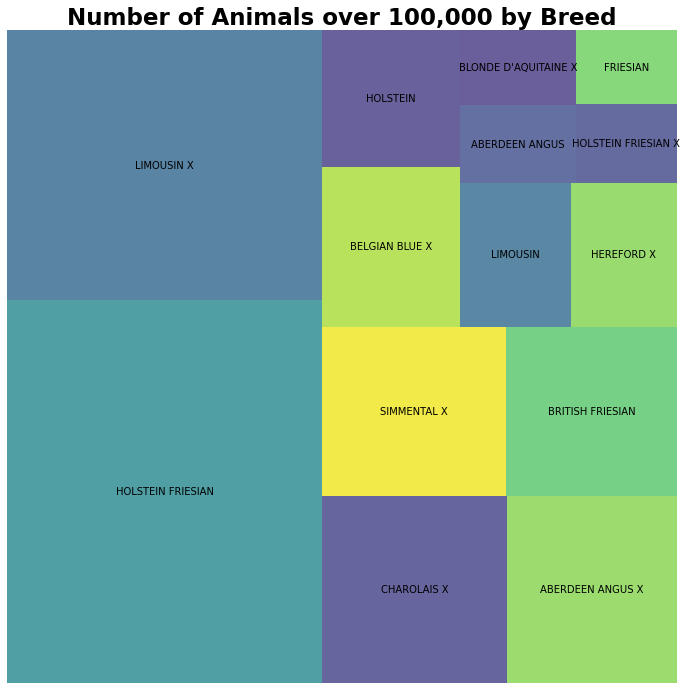

In [51]:
#Treemap
fig, ax = plt.subplots(1, figsize = (12,12))
squarify.plot(sizes=dftop['Num_Animals'], 
              label=dftop['Breed'], 
              alpha=.8 )
plt.title("Number of Animals over 100,000 by Breed", fontsize=23, fontweight="bold")
plt.axis('off')
plt.show()

In [52]:
#Load in data
d = pd.read_csv("unemployement-rate-1948-2010.csv")
d

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5
...,...,...,...,...
741,LNS14000000,2009,M10,10.1
742,LNS14000000,2009,M11,10.0
743,LNS14000000,2009,M12,10.0
744,LNS14000000,2010,M01,9.7


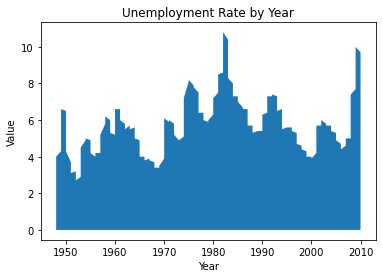

In [3]:
#Area chart
x = d.Year
y = d.Value

plt.fill_between(x, y)
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Unemployment Rate by Year")
plt.show()

In [60]:
#Using unemployment data, creating pivot table off of period
df = d.pivot(index = 'Year',
       columns = 'Period',
       values = 'Value')
df

Period,M01,M02,M03,M04,M05,M06,M07,M08,M09,M10,M11,M12
Year,,,,,,,,,,,,
1948,3.4,3.8,4.0,3.9,3.5,3.6,3.6,3.9,3.8,3.7,3.8,4.0
1949,4.3,4.7,5.0,5.3,6.1,6.2,6.7,6.8,6.6,7.9,6.4,6.6
1950,6.5,6.4,6.3,5.8,5.5,5.4,5.0,4.5,4.4,4.2,4.2,4.3
1951,3.7,3.4,3.4,3.1,3.0,3.2,3.1,3.1,3.3,3.5,3.5,3.1
1952,3.2,3.1,2.9,2.9,3.0,3.0,3.2,3.4,3.1,3.0,2.8,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2006,4.7,4.8,4.7,4.7,4.6,4.6,4.7,4.7,4.5,4.4,4.5,4.4
2007,4.6,4.5,4.4,4.5,4.4,4.6,4.6,4.6,4.7,4.7,4.7,5.0
2008,5.0,4.8,5.1,5.0,5.4,5.5,5.8,6.1,6.2,6.6,6.9,7.4


In [64]:
#Setting seaborn style. Got help from Sam Loyd on this part in Teams.
plt.style.use('seaborn')
sns.set_style("white")
sns.set_theme(style = "ticks")

Text(0.5, 0, 'Year')

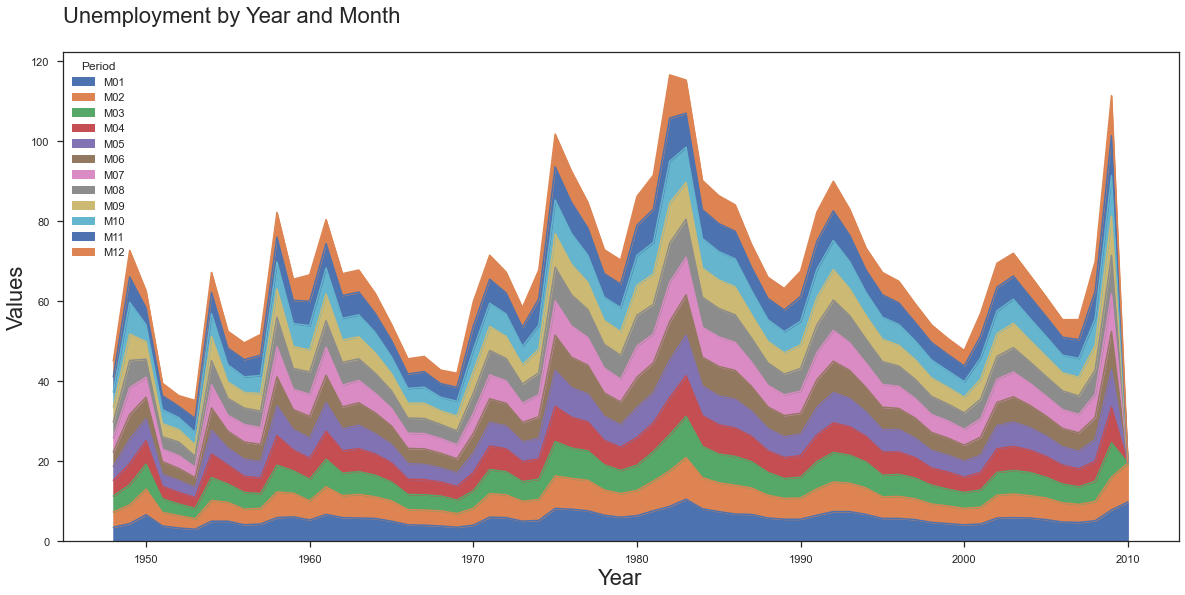

In [68]:
#Creating stacked area chart. Again Sam's help finally got me here.
df.plot.area(figsize = (20,9))
plt.title("Unemployment by Year and Month\n", fontsize = 22, loc = 'left')
plt.ylabel("Values", fontsize = 22)
plt.xlabel("Year", fontsize = 22)